<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana13/AjusteGaussiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#!pip install emcee
#!pip install corner

In [5]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana13/Data/Gaussiano.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana13/Data/Gaussiano.csv'

In [6]:
data = pd.read_csv(file,sep=',')
data.keys()

Index(['x'], dtype='object')

In [9]:
X = data['x']
len(X)

100

(array([ 3.,  9.,  6., 13., 25., 19., 14.,  8.,  2.,  1.]),
 array([-0.3806526 ,  0.56123737,  1.50312733,  2.4450173 ,  3.38690727,
         4.32879724,  5.2706872 ,  6.21257717,  7.15446714,  8.0963571 ,
         9.03824707]),
 <BarContainer object of 10 artists>)

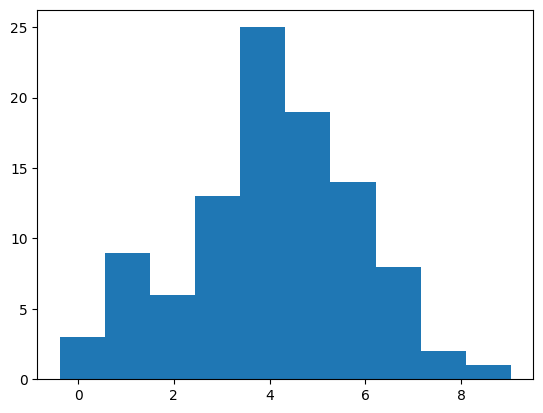

In [8]:
plt.hist(X)

In [10]:
def Likelihood(p,x):
  mean,std = p
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))

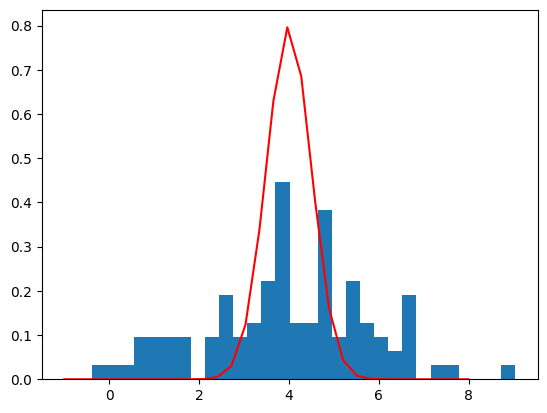

In [19]:
plt.hist(X,bins=30,density=True)
x=np.linspace(-1,8,30)
plt.plot(x,Likelihood([4,0.5],x),color='r')

In [20]:
def JointLikelihood(p,x):
  return -np.sum( np.log(Likelihood(p,x)))

In [23]:
p0 = np.array([6,5])
import scipy.optimize as spo
result = spo.minimize(JointLikelihood,p0,args=(X))
result.x

array([4.01514064, 1.80555962])

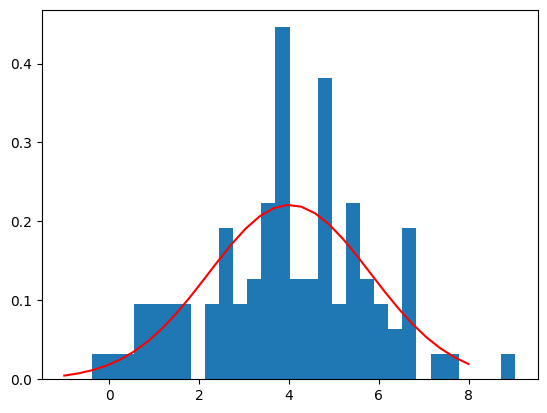

In [24]:
plt.hist(X,bins=30,density=True)
x=np.linspace(-1,8,30)
plt.plot(x,Likelihood(result.x,x),color='r')